In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = '_SRbeforeISRcuts_good_vtx_none_NJetG2'

In [3]:
# Signal
#sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data{suffix}.coffea')[0]

In [6]:
# sig_histo / bkg_histo is a dictionary of variables
print(sig_histo.keys())

NameError: name 'sig_histo' is not defined

## Signal

In [7]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [8]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections', 'n(good vertex) > 0', 'No b-tagged jets']

In [9]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [10]:
table = eff_cutflow
table.columns = cutnames

In [11]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_Efficiency_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_Efficiency__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_Efficiency__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_Efficiency__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv


In [12]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [13]:
table = cts_cutflow
table.columns = cutnames

In [14]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.3947,20.8859,17.9854
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,164.1743",505.0124,436.6277
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,466.2272",624.8689,542.2316
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,75.1374,35.7416,30.8008
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,976.3460",833.7494,708.8576
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,742.8429","1,122.1881",969.1829
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,632.8390",577.0690,497.2492
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,995.1698","8,680.3702","7,690.3953"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,168.2571,82.4653,70.8453
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,212.7201","1,714.4062","1,484.6042"


In [15]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_EventCount_Weighted_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_EventCount_Weighted__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv


In [16]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [17]:
table = raw_cutflow
table.columns = cutnames

In [18]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,28531,13423,11559
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,36636,15892,13740
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,12401,5285,4586
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,12044,5729,4937
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,10969,4627,3934
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,9197,3763,3250
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,2578,911,785
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1923,491,435
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,651,319,274
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,8853,3603,3120


In [19]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'Signal_ctau-{int(ct)}_samples_Raw_{suffix}'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//Signal_ctau-1_samples_Raw__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-10_samples_Raw__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv
Saved: ./csv/Cutflow/Efficiency//Signal_ctau-100_samples_Raw__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p1_ct_1_m5to40.png


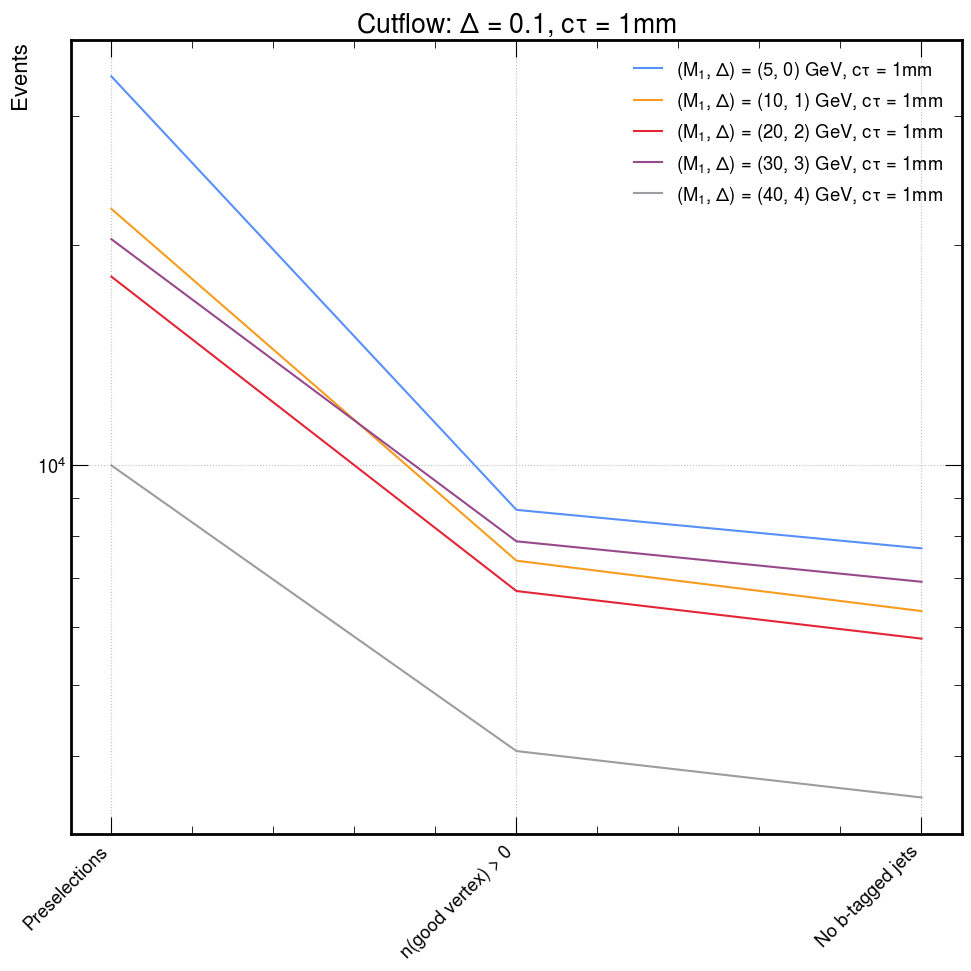

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p1_ct_10_m5to40.png


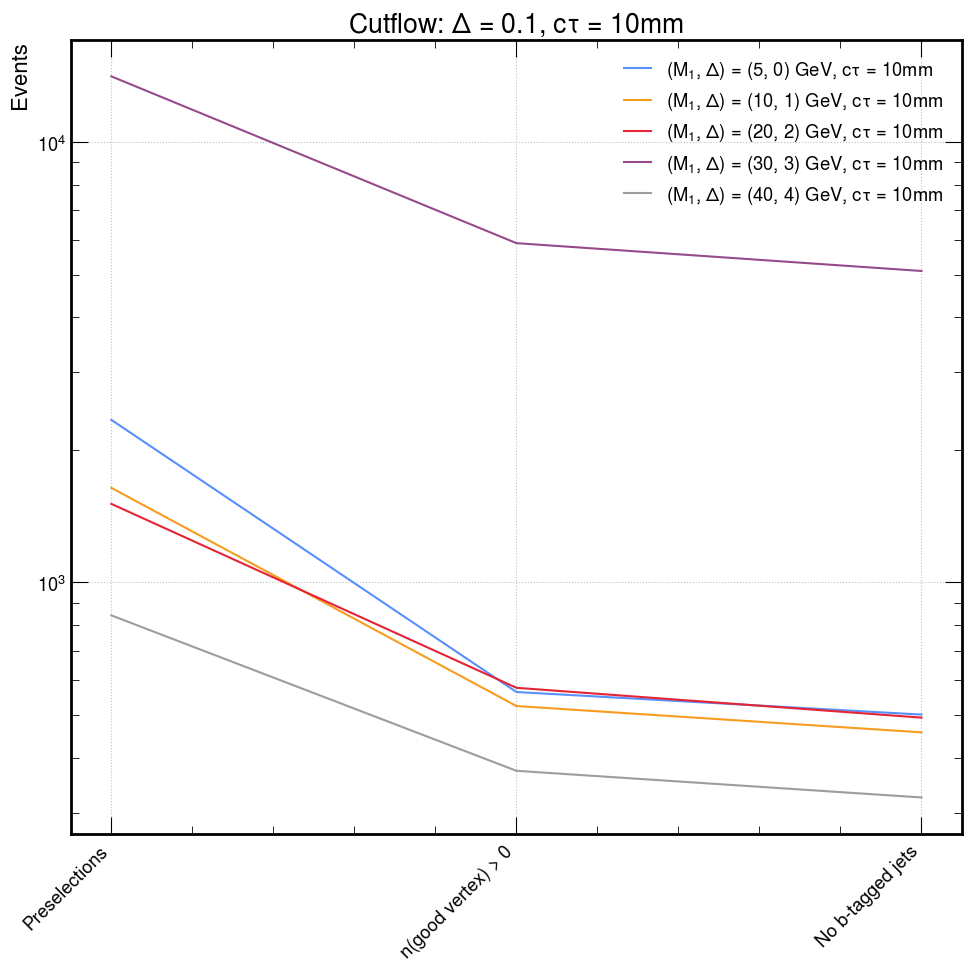

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p1_ct_100_m5to40.png


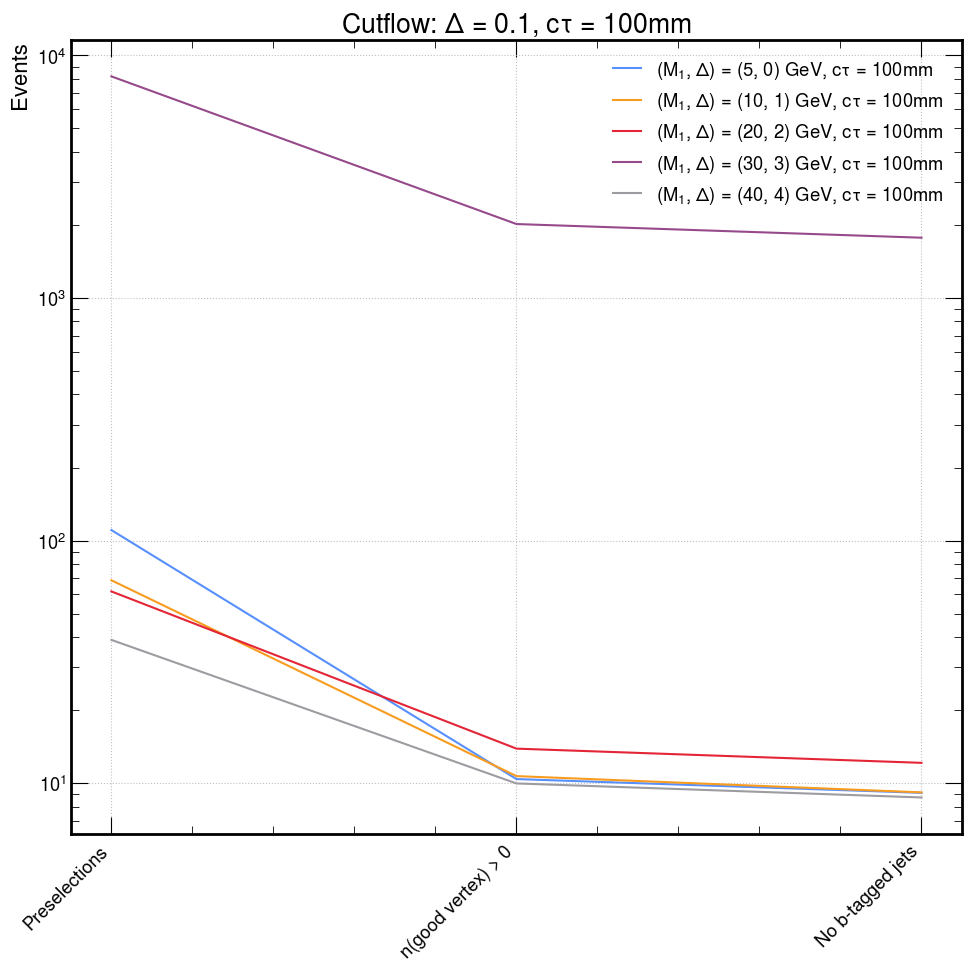

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p2_ct_1_m5to40.png


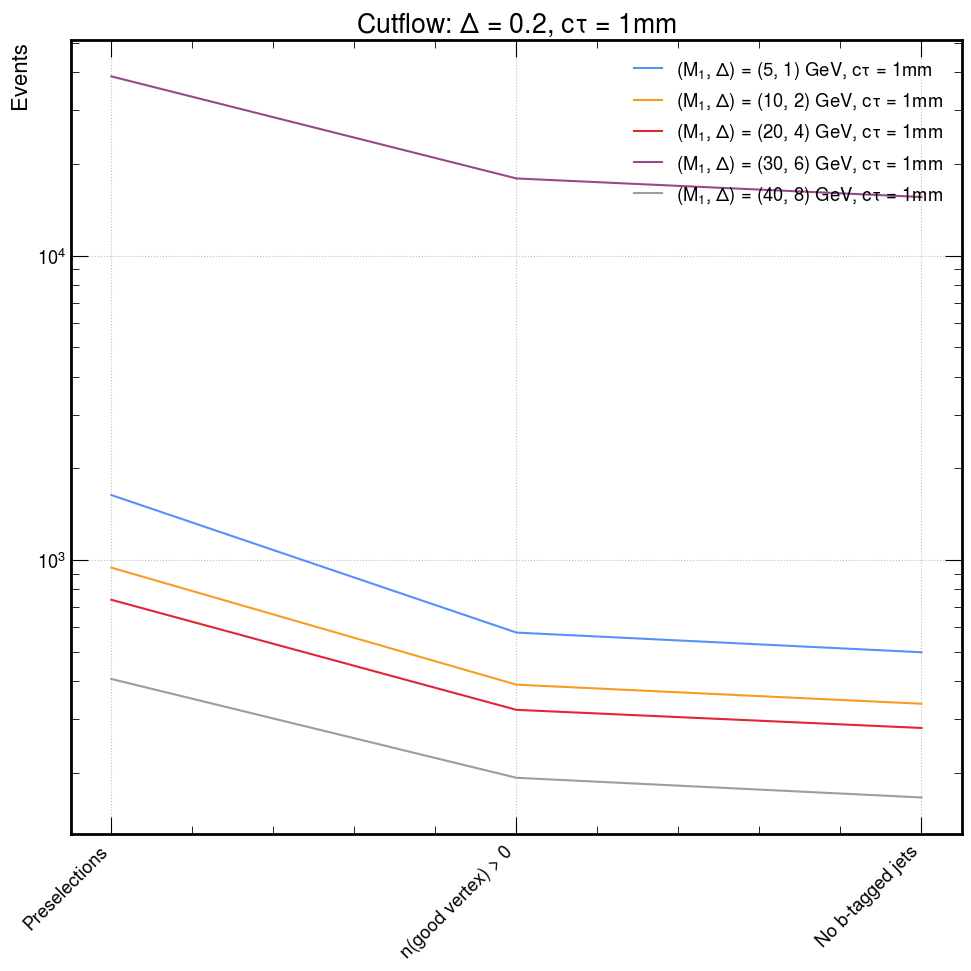

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p2_ct_10_m5to40.png


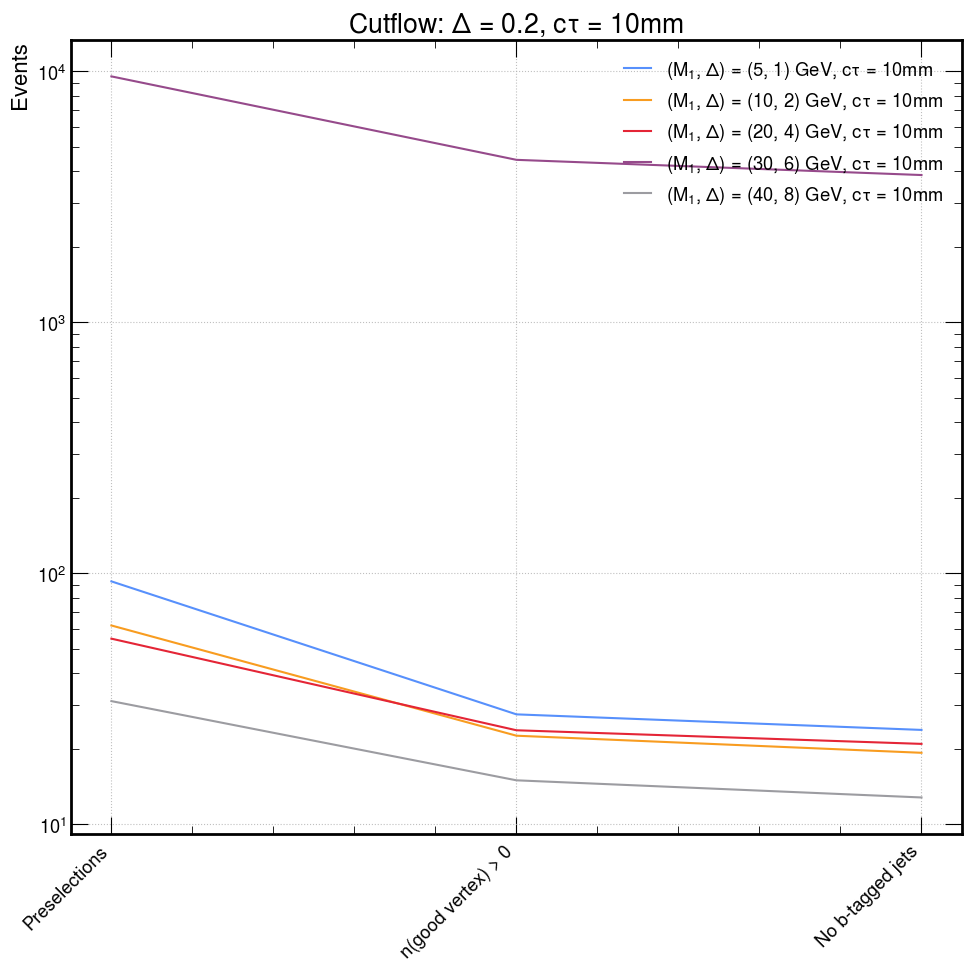

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p2_ct_100_m5to40.png


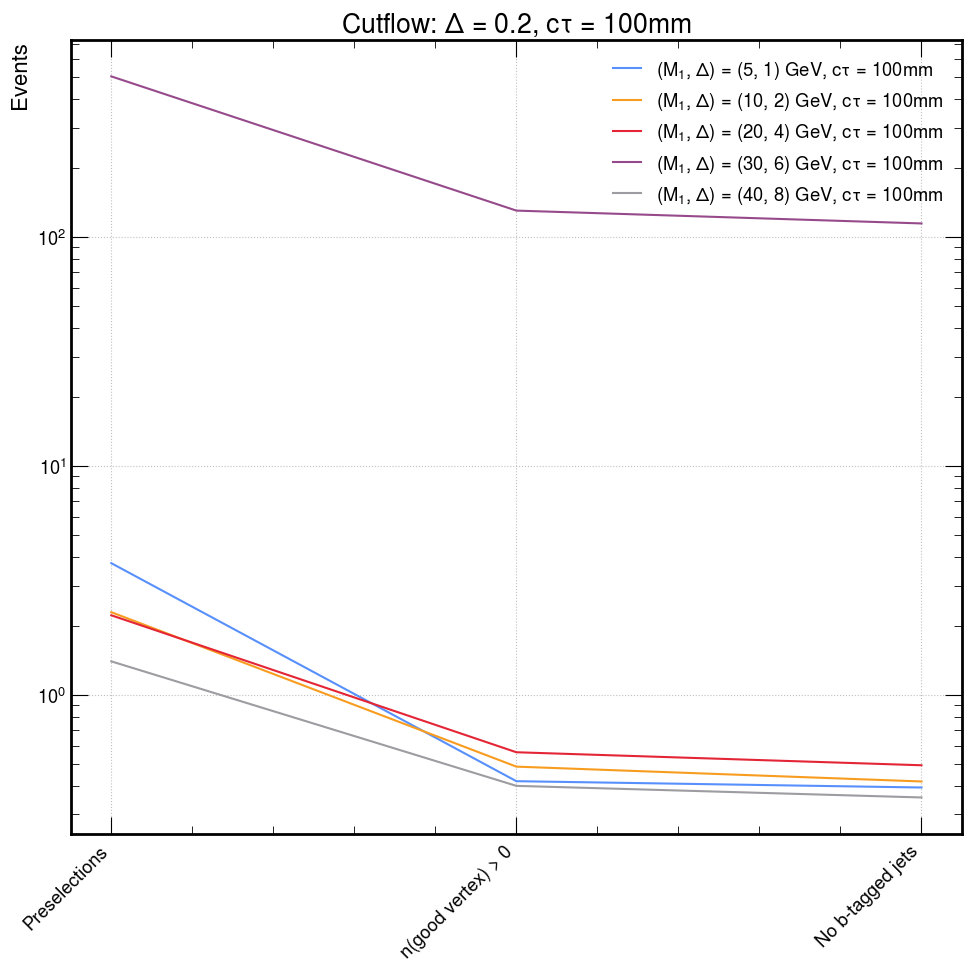

In [20]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p1_ct_1_m50to100.png


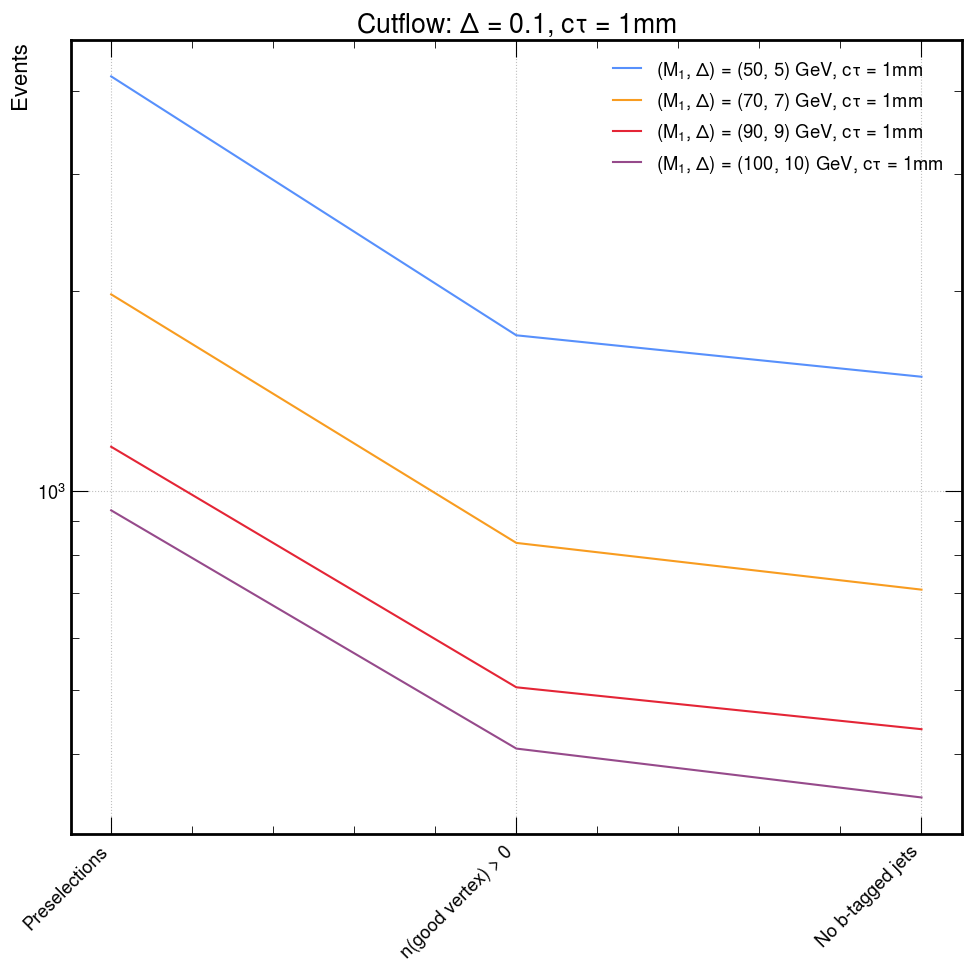

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p1_ct_10_m50to100.png


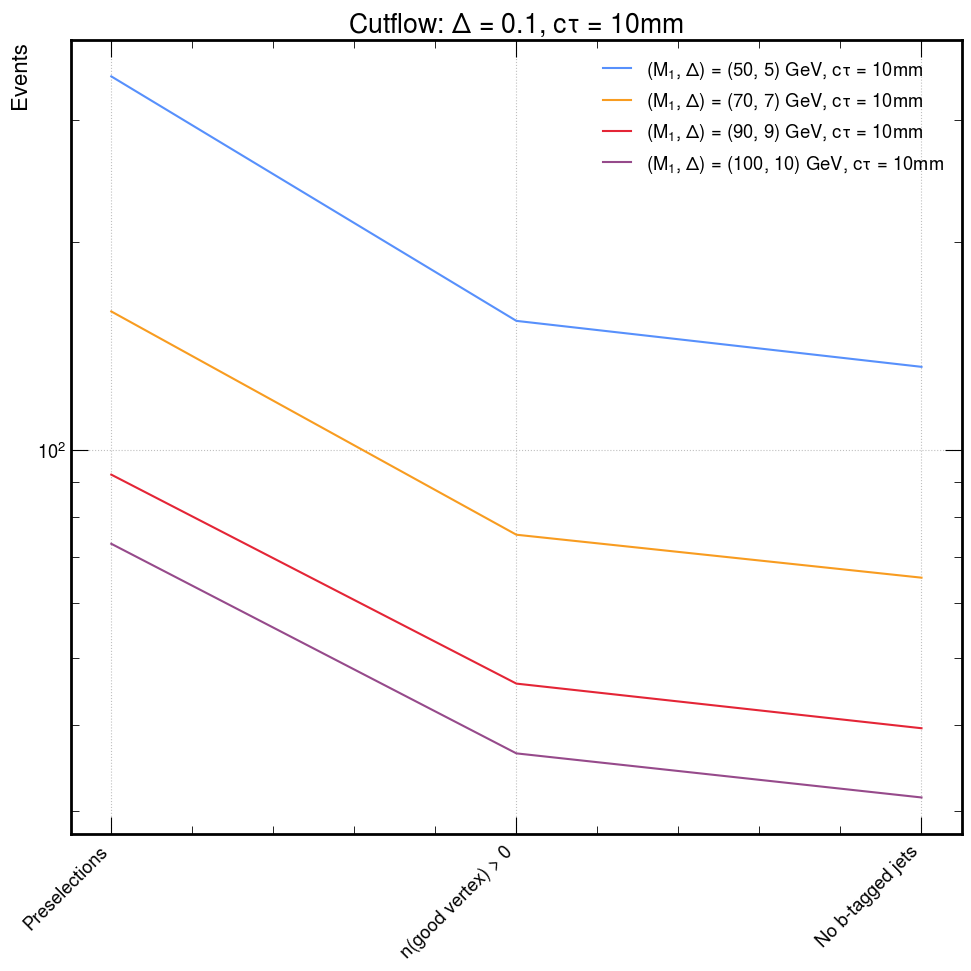

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p1_ct_100_m50to100.png


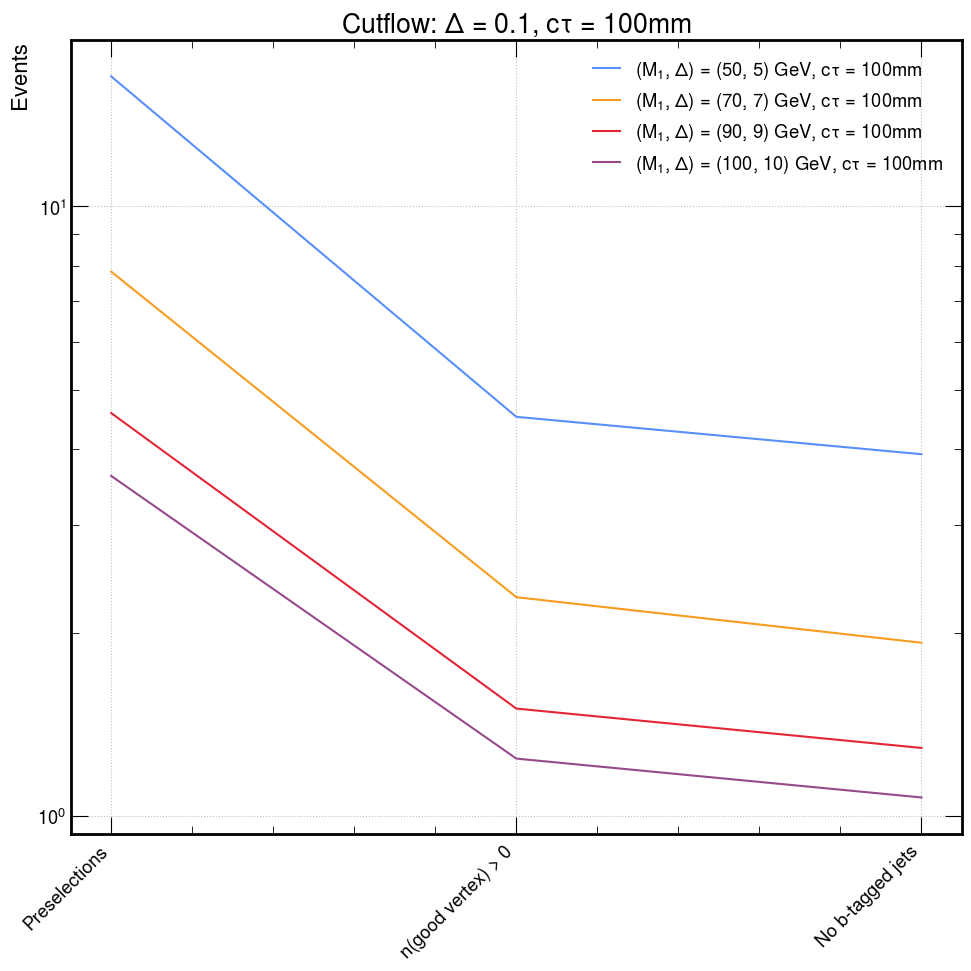

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p2_ct_1_m50to100.png


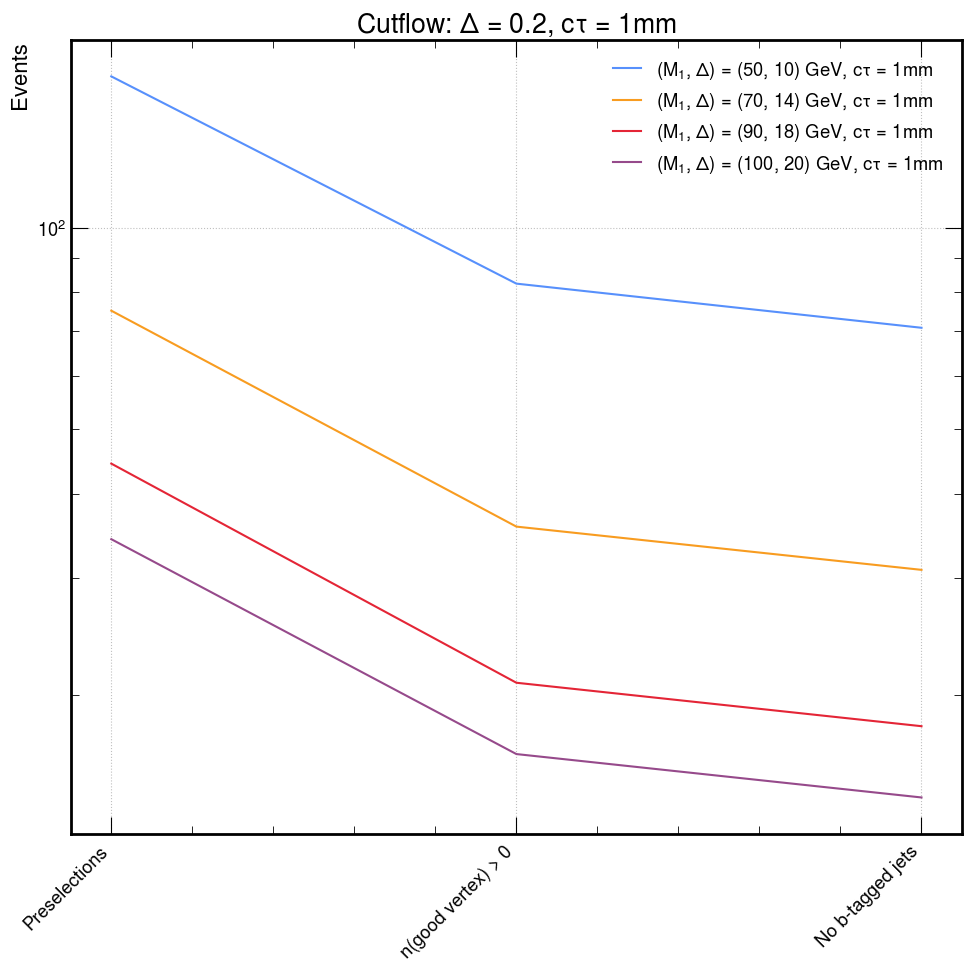

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p2_ct_10_m50to100.png


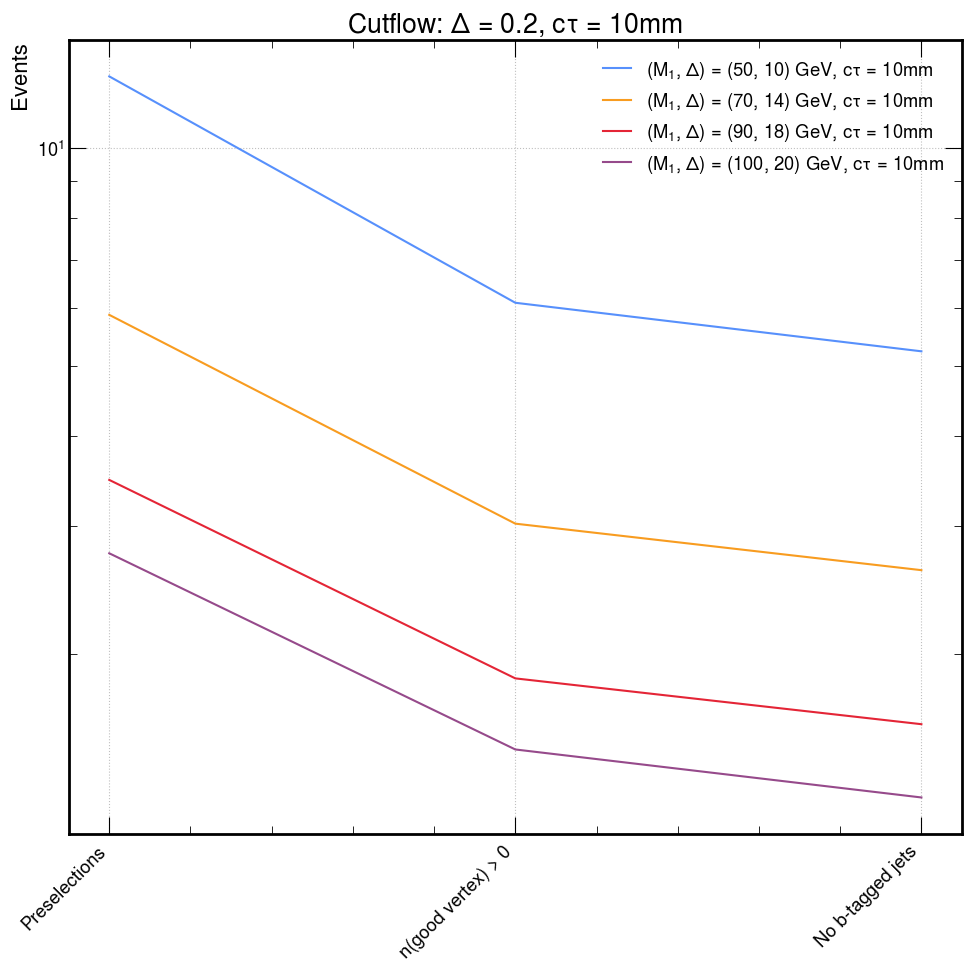

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_signal_delta_0p2_ct_100_m50to100.png


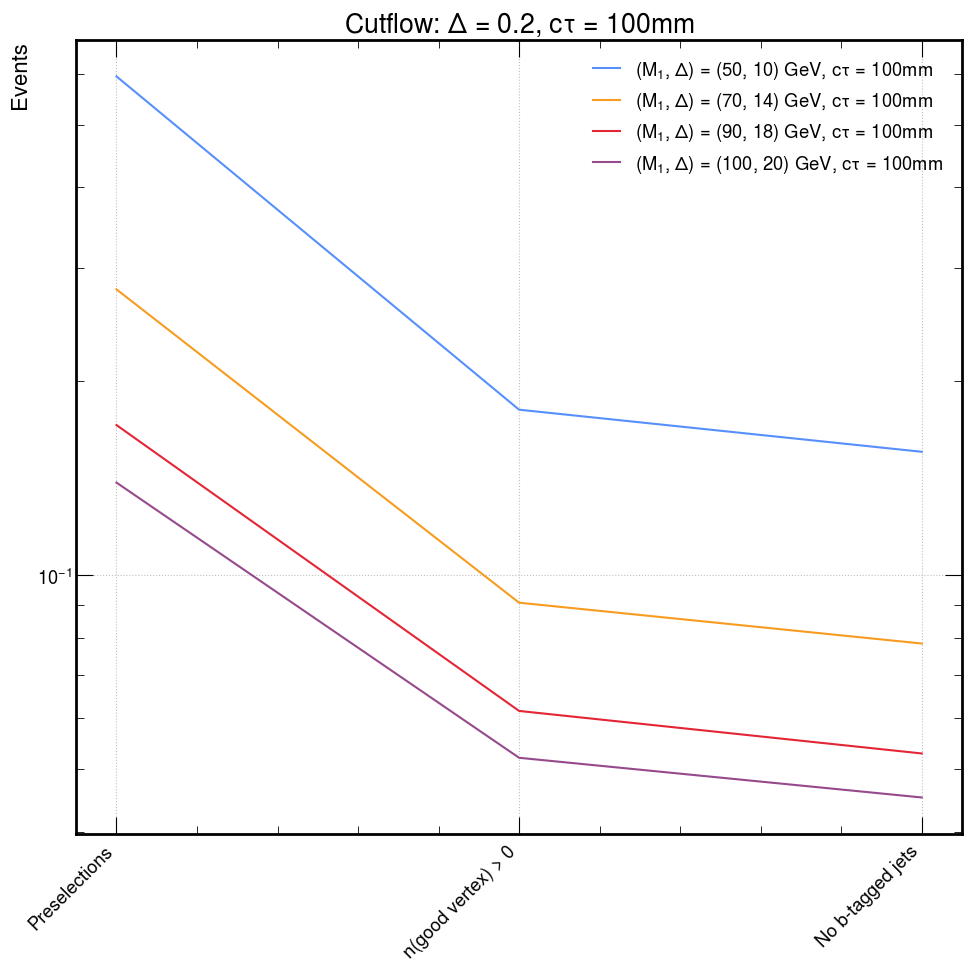

In [21]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [6]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets
DY-M4to50,0.00002494,0.00001436,0.00000568
DY-M50,0.00037497,0.00019542,0.00008277
SingleTop,0.00022295,0.00012584,0.00003826
ZJets,0.00231871,0.00097582,0.00055598
TTX,0.00127165,0.00107909,0.00025790
QCD,0.00000217,0.00000173,0.00000061
Multiboson,0.00062600,0.00031654,0.00014920
TTbar,0.00041435,0.00033142,0.00009037
WJets,0.00096802,0.00043545,0.00022141
ZGamma,0.00031387,0.00012401,0.00006116


In [7]:
# Save as csv
outdir = './csv/Cutflow/Efficiency/'
outname = f'Background_Efficiency_{suffix}'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/Efficiency//Background_Efficiency__SRbeforeISRcuts_good_vtx_none_NJetG2.csv


In [8]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets
DY-M4to50,355.33,204.58,80.94
DY-M50,"4,144.22","2,159.77",914.80
SingleTop,"3,467.54","1,957.24",595.01
ZJets,"49,623.76","20,883.94","11,898.73"
TTX,394.77,334.99,80.06
QCD,"46,583.80","37,077.72","13,063.26"
Multiboson,"4,362.92","2,206.10","1,039.87"
TTbar,"20,615.75","16,489.41","4,496.09"
WJets,"169,523.91","76,257.04","38,774.24"
ZGamma,"1,609.71",635.99,313.67


In [9]:
# Save to csv
outdir = './csv/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted_{suffix}'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Weighted//Background_EventCount_Weighted__SRbeforeISRcuts_good_vtx_none_NJetG2.csv


In [10]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets
DY-M4to50,24340,19434,6884
DY-M50,254356,208348,58896
SingleTop,43674,18914,5340
ZJets,709551,453841,245085
TTX,130908,116593,26641
QCD,30275,26849,6396
Multiboson,23952,13659,6231
TTbar,484904,384355,104320
WJets,1118768,782947,305977
ZGamma,6251,2796,1187


In [11]:
outdir = './csv/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw_{suffix}'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/Cutflow/EventCount_Raw//Background_EventCount_Raw__SRbeforeISRcuts_good_vtx_none_NJetG2.csv


In [12]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 71256.68


In [13]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['No b-tagged jets']).transpose(), pd.DataFrame(bkg_cts_raw_df['No b-tagged jets']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,DY-M4to50,DY-M50,SingleTop,ZJets,TTX,QCD,Multiboson,TTbar,WJets,ZGamma,Total
Weighted Counts,80.94,914.80,595.01,"11,898.73",80.06,"13,063.26","1,039.87","4,496.09","38,774.24",313.67,"71,256.68"
Raw Counts,"6,884.00","58,896.00","5,340.00","245,085.00","26,641.00","6,396.00","6,231.00","104,320.00","305,977.00","1,187.00","766,957.00"


## Data

In [14]:
pd.options.display.float_format = '{:,.1f}'.format
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,No b-tagged jets
data_2018_Data_MET_UL18_MET_Run2018C,"68,834.0","34,271.0","12,306.0"
data_2018_Data_MET_UL18_MET_Run2018D,"304,561.0","152,841.0","57,190.0"
data_2018_Data_MET_UL18_MET_Run2018B,"60,605.0","29,195.0","10,342.0"
data_2018_Data_MET_UL18_MET_Run2018A,"119,182.0","57,035.0","19,820.0"
Total,"553,182.0","273,342.0","99,658.0"


In [15]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections        1.8
n(good vertex) > 0   1.7
No b-tagged jets     1.4
Name: Total, dtype: float64

In [16]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections        553,182.0
n(good vertex) > 0   273,342.0
No b-tagged jets      99,658.0
Name: Total, dtype: float64

In [17]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections        300,681.7
n(good vertex) > 0   158,206.8
No b-tagged jets      71,256.7
Name: Total, dtype: float64

/tmp/ipykernel_190351/177910639.py:18: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


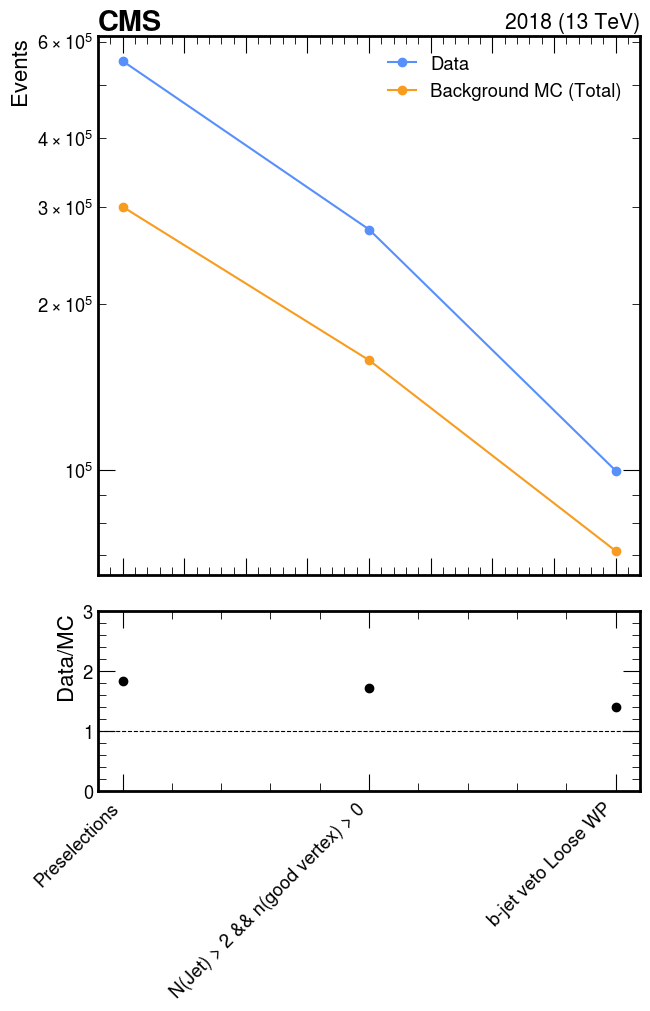

In [18]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')


plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,3])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jet) > 2 && n(good vertex) > 0'
cuts[2] = 'b-jet veto Loose WP'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')


### Plot the efficiency

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_none_NJetG2_background.png


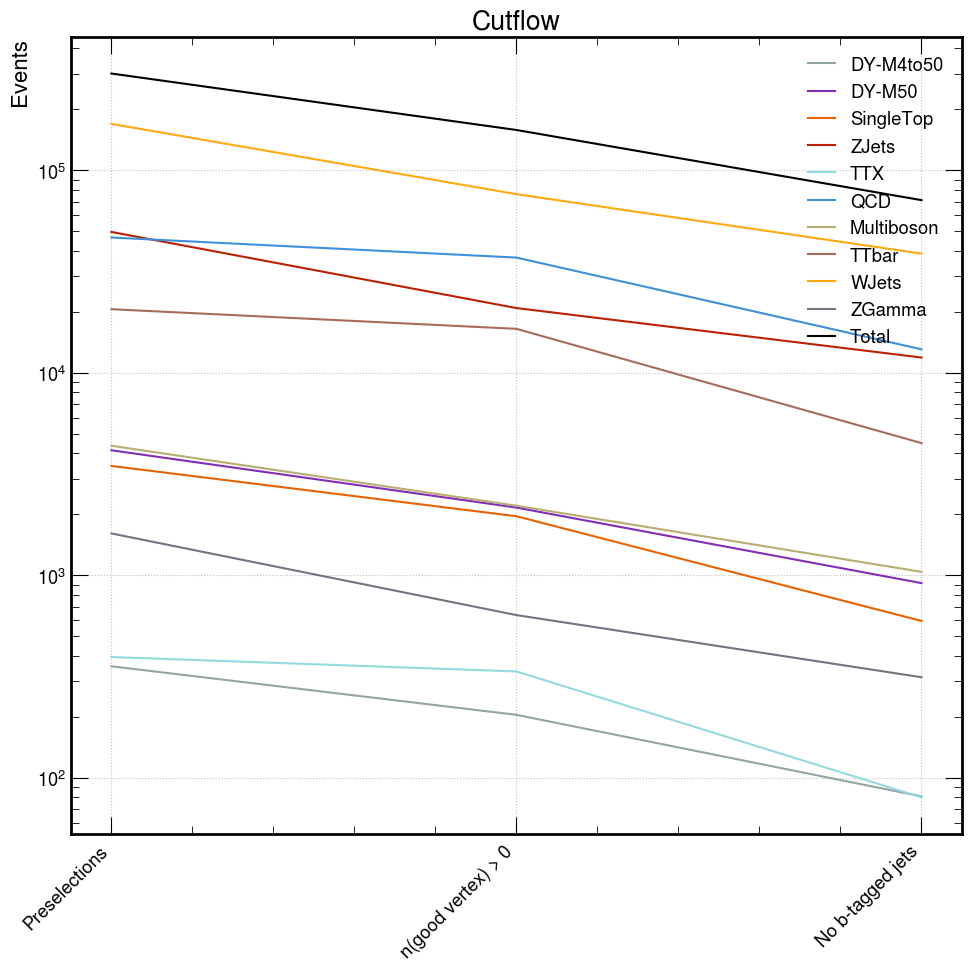

In [19]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': f'Cutflow_{suffix}_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/sqrt(B)

In [62]:
# S/sqrt(B) cutflow
pd.options.display.float_format = '{:,.5f}'.format
utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

,Preselections,n(good vertex) > 0,No b-tagged jets
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,0.00002,0.00058,0.00064
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.00000,0.00002,0.00003
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,0.00001,0.00071,0.00079
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,0.00015,0.00801,0.00891
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.00000,0.00003,0.00003
...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,0.00011,0.00627,0.00697
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,0.07449,2.83595,3.12598
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,0.00310,0.15651,0.17061
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.00001,0.00048,0.00053


Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p1_ct_1_m5to40.png


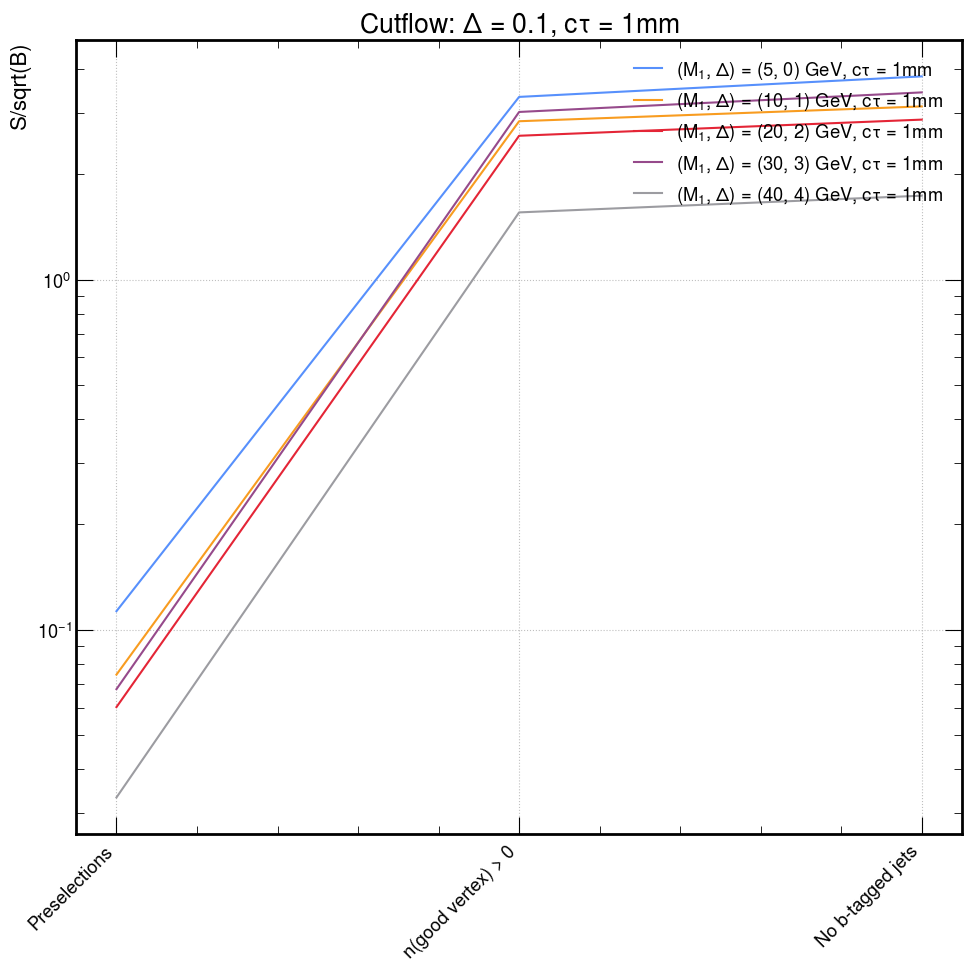

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p1_ct_10_m5to40.png


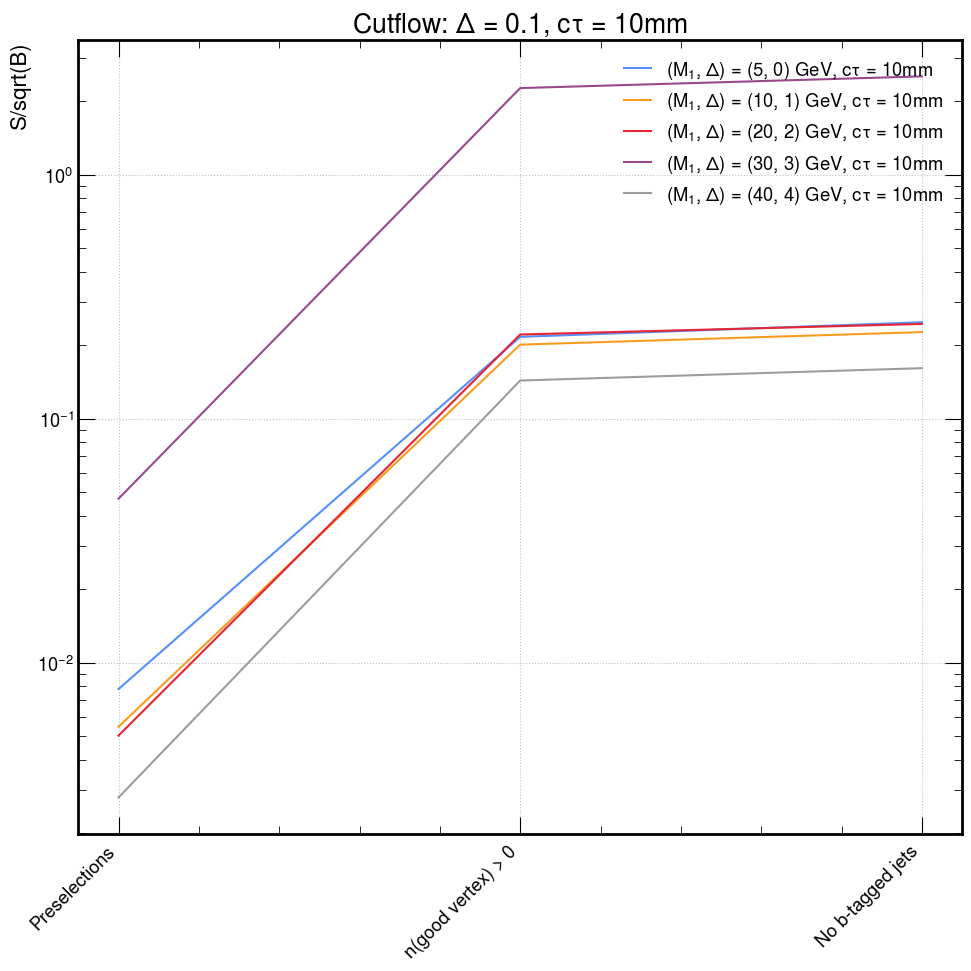

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p1_ct_100_m5to40.png


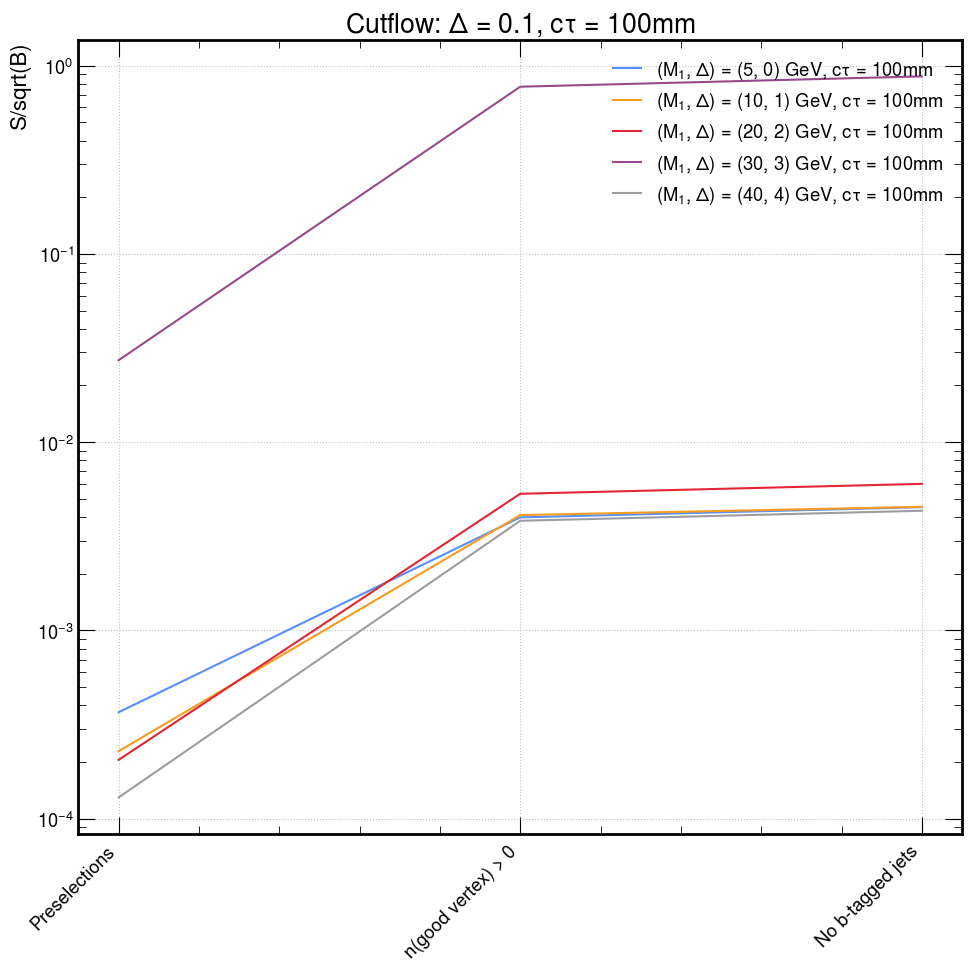

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p2_ct_1_m5to40.png


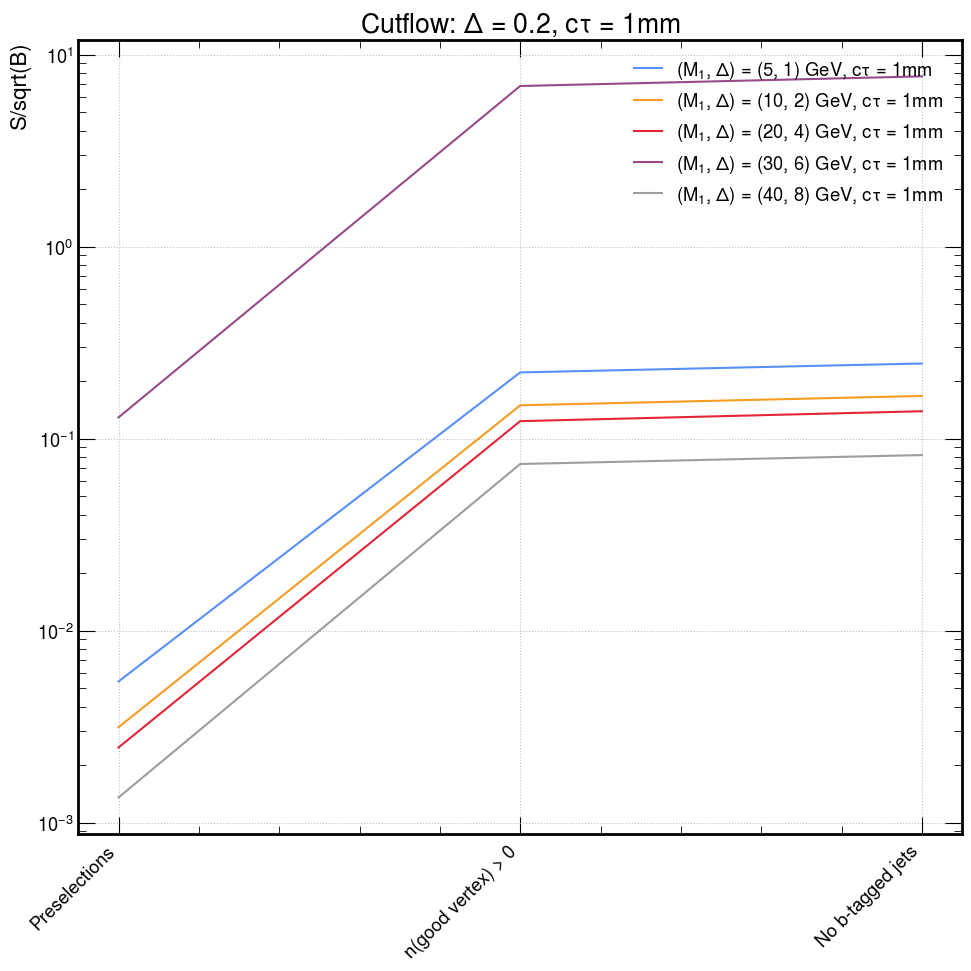

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p2_ct_10_m5to40.png


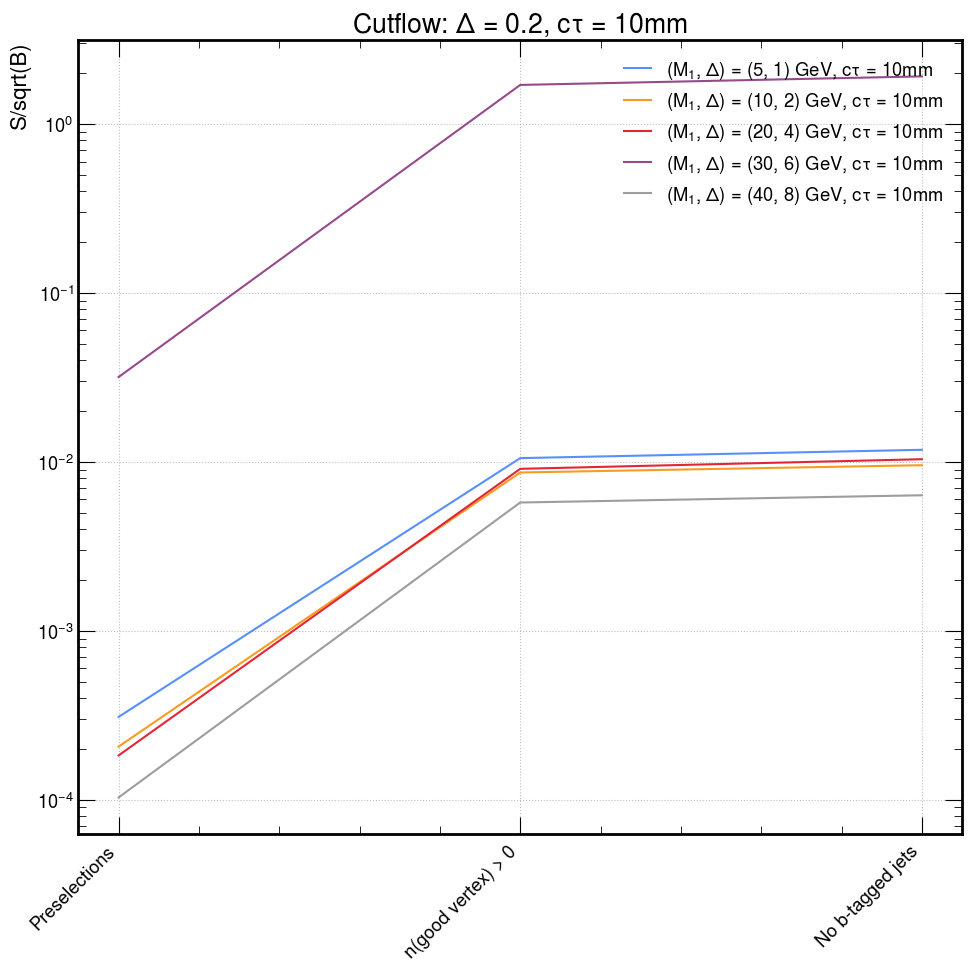

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p2_ct_100_m5to40.png


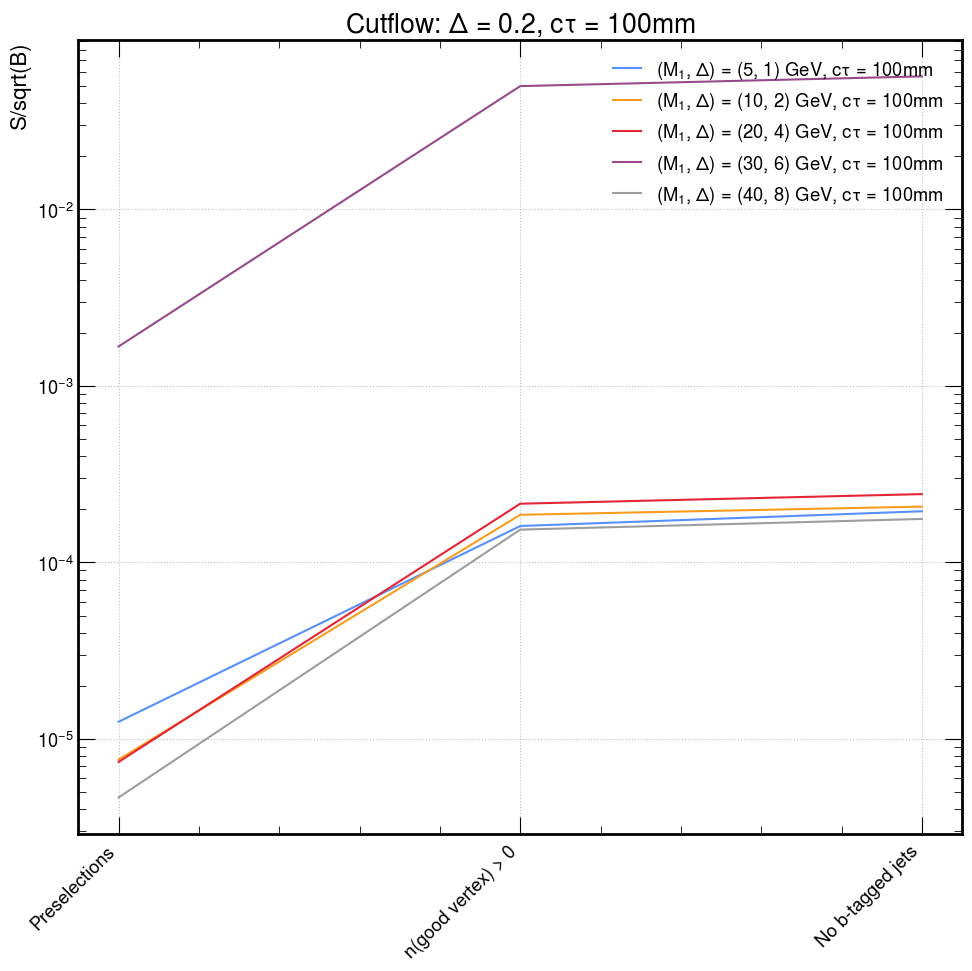

In [63]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p1_ct_1_m50to100.png


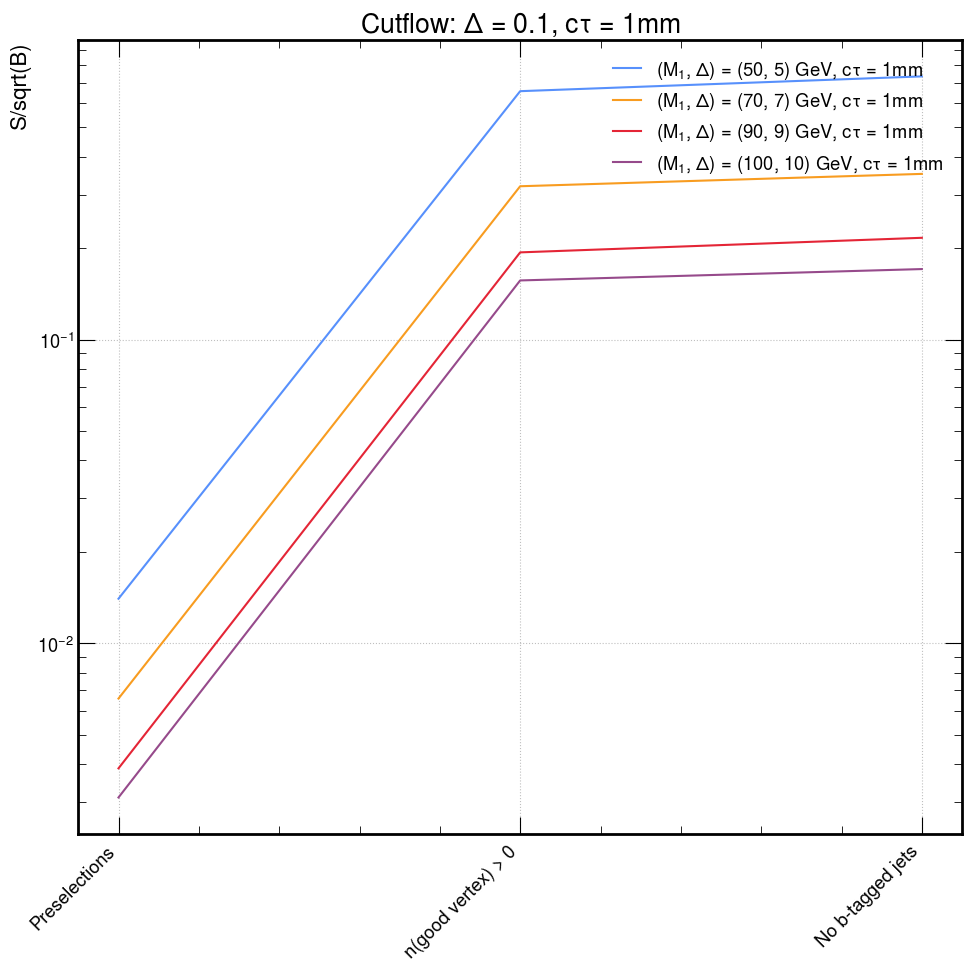

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p1_ct_10_m50to100.png


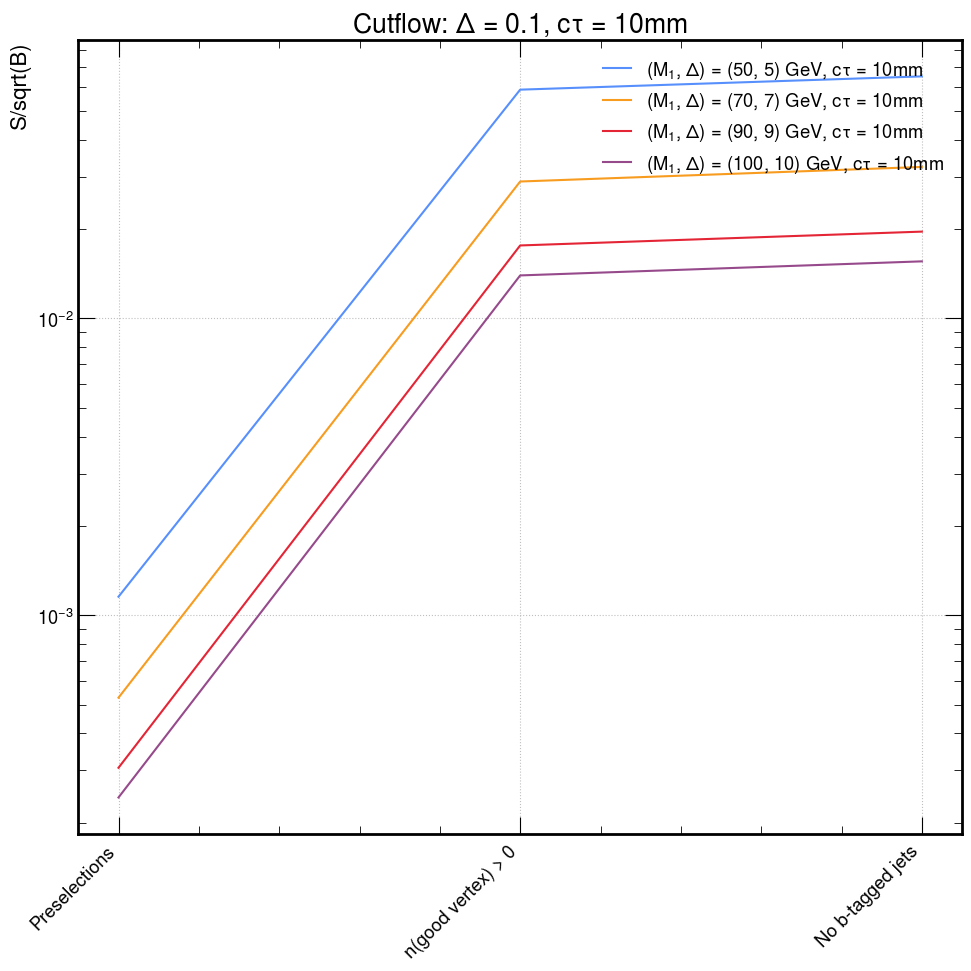

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p1_ct_100_m50to100.png


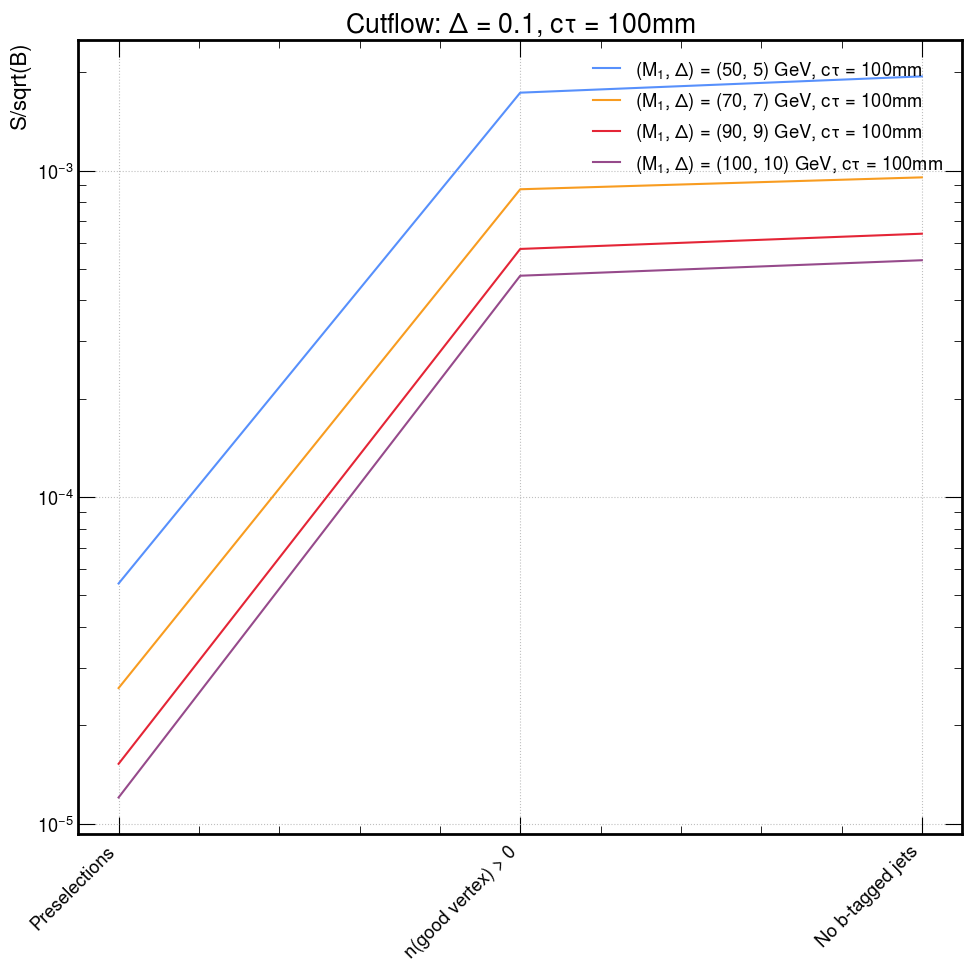

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p2_ct_1_m50to100.png


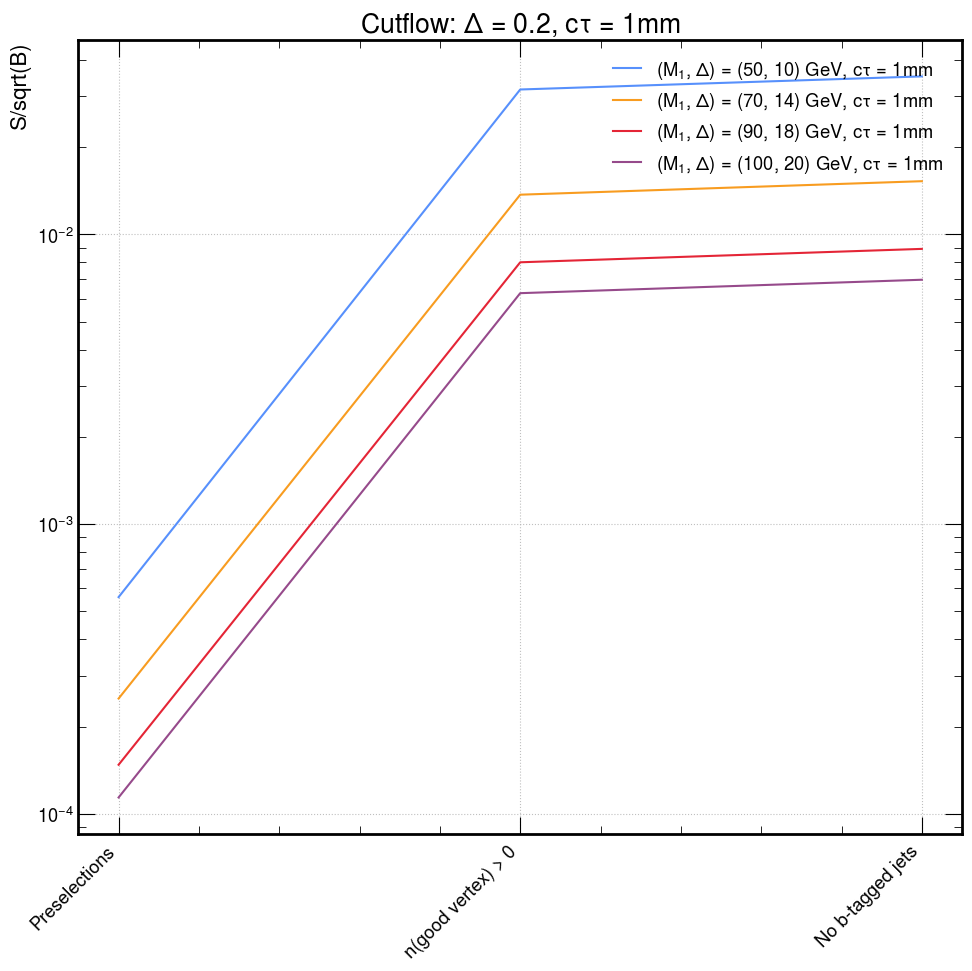

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p2_ct_10_m50to100.png


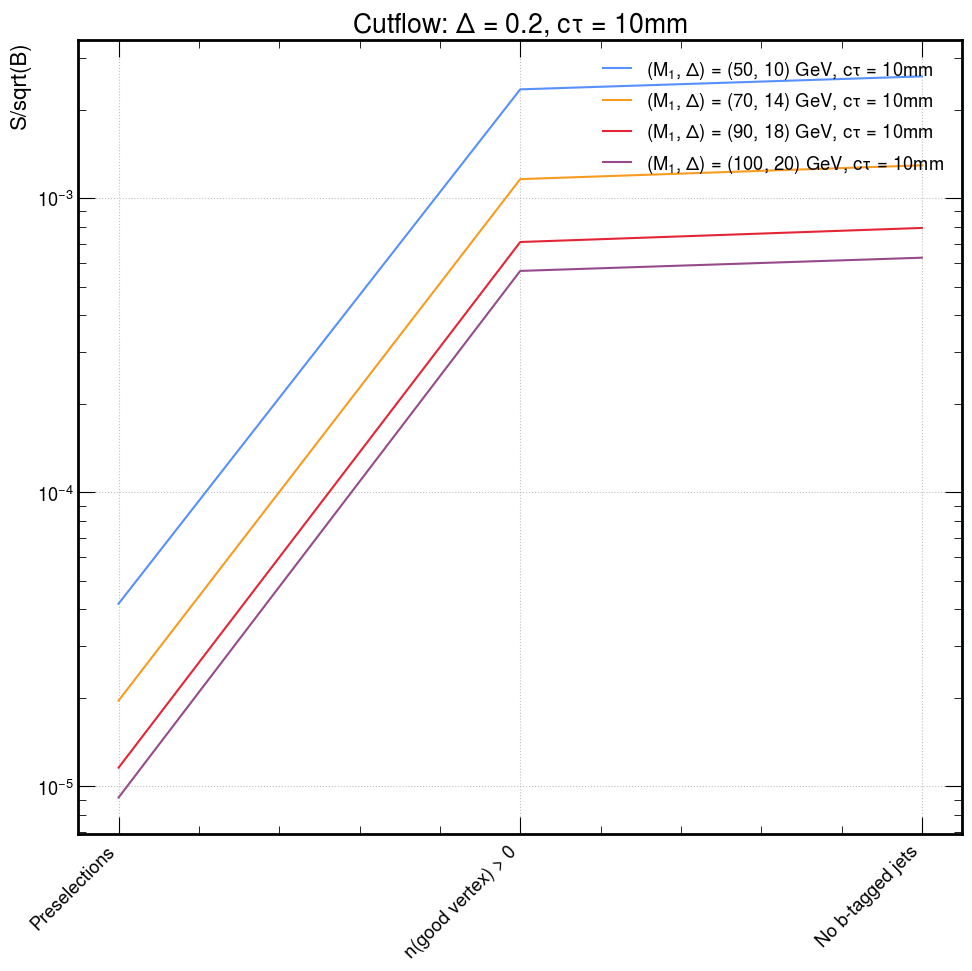

Saved: ./plots/cutflow//Cutflow__SRbeforeISRcuts_good_vtx_v7_NJetG0L3_s_over_b_delta_0p2_ct_100_m50to100.png


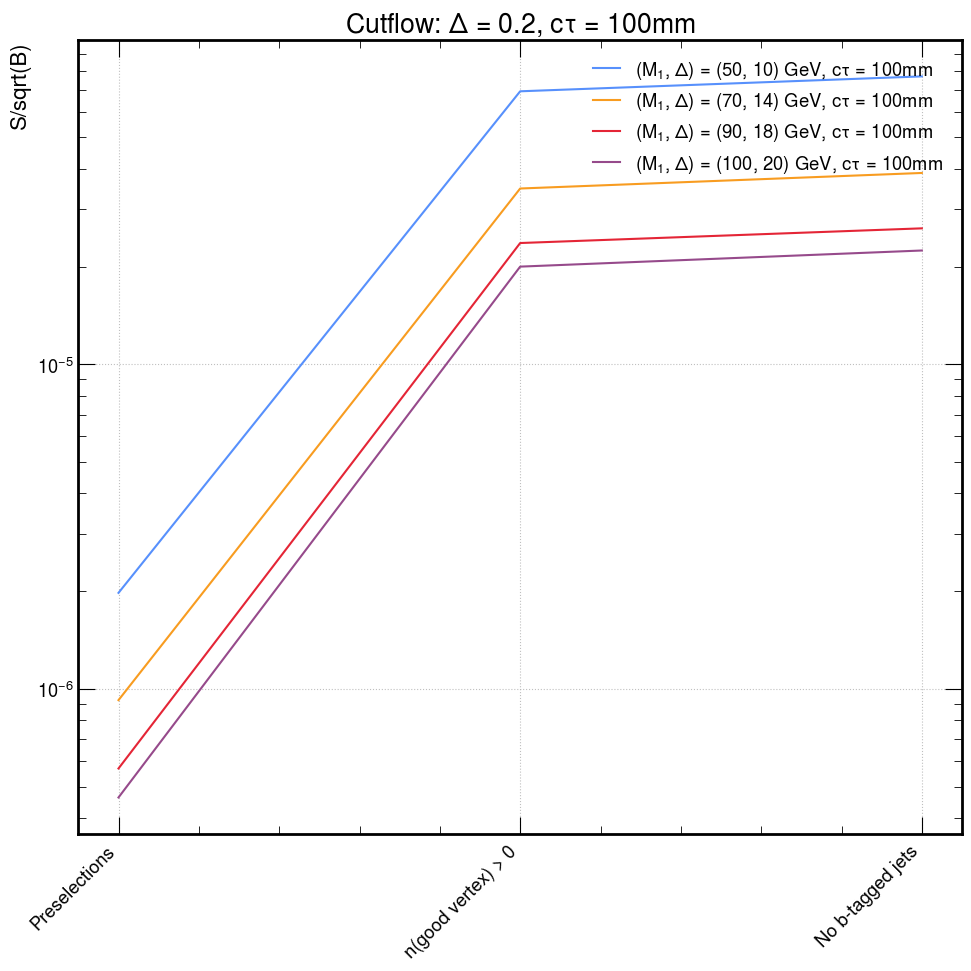

In [64]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_{suffix}_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

#### S/sqrt(B) at the end of the cutflow

In [65]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

2019.0901868305186

In [66]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [67]:
pd.options.display.float_format = '{:,.4f}'.format

In [68]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,No b-tagged jets,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,500.8931,5.0000,0.1000,10.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,9.1187,5.0000,0.1000,100.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,497.2492,5.0000,0.2000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"7,690.3953",5.0000,0.1000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,23.8062,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,1.2654,100.0000,0.2000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,14.0741,100.0000,0.2000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,344.4672,100.0000,0.1000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,1.0727,100.0000,0.1000,100.0000


In [69]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [70]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,500.8931,"2,019.0902",11.1472
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,9.1187,"2,019.0902",0.2029
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,497.2492,"2,019.0902",11.0661
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"7,690.3953","2,019.0902",171.1476
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,23.8062,"2,019.0902",0.5298
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,14.0741,"2,019.0902",0.3132
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,344.4672,"2,019.0902",7.6660
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,1.0727,"2,019.0902",0.0239
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,31.4240,"2,019.0902",0.6993


In [71]:
outdir = './csv/SR_Yields/'
outname = f'S_over_B_{suffix}'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//S_over_B__SRbeforeISRcuts_good_vtx_v7_NJetG0L3.csv


### ctau = 1mm

In [72]:
ct = 1.0

In [73]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"7,690.3953","2,019.0902",171.1476
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"6,311.6266","2,019.0902",140.4635
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"5,787.1984","2,019.0902",128.7925
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"6,921.8195","2,019.0902",154.0432
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"3,509.1834","2,019.0902",78.0959
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,"1,484.6042","2,019.0902",33.0395
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,969.1829,"2,019.0902",21.5689
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,708.8576,"2,019.0902",15.7754
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,542.2316,"2,019.0902",12.0672
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,436.6277,"2,019.0902",9.7170


In [74]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,497.2492,"2,019.0902",11.0661
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,336.8420,"2,019.0902",7.4963
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,280.4308,"2,019.0902",6.2409
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"15,567.0435","2,019.0902",346.4402
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,165.7582,"2,019.0902",3.6889
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,70.8453,"2,019.0902",1.5766
62,60.0,0.2,1.0,0.0000,"2,019.0902",0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,30.8008,"2,019.0902",0.6855
65,80.0,0.2,1.0,0.0000,"2,019.0902",0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,17.9854,"2,019.0902",0.4003


### ctau = 10mm

In [75]:
ct = 10.0

In [76]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,500.8931,"2,019.0902",11.1472
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,456.4885,"2,019.0902",10.1590
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,492.9819,"2,019.0902",10.9712
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"5,098.0256","2,019.0902",113.4551
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,324.7279,"2,019.0902",7.2267
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,131.9208,"2,019.0902",2.9359
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,86.3008,"2,019.0902",1.9206
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,65.3532,"2,019.0902",1.4544
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,48.9774,"2,019.0902",1.0900
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,39.5758,"2,019.0902",0.8807


In [77]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,23.8062,"2,019.0902",0.5298
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,19.2989,"2,019.0902",0.4295
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,20.9423,"2,019.0902",0.4661
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"3,866.8653","2,019.0902",86.0560
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,12.8103,"2,019.0902",0.2851
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,5.2341,"2,019.0902",0.1165
63,60.0,0.2,10.0,0.0000,"2,019.0902",0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,2.6084,"2,019.0902",0.0581
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.9727,"2,019.0902",0.0439
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,1.5977,"2,019.0902",0.0356


### ctau = 100mm

In [78]:
ct = 100.0

In [79]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,9.1187,"2,019.0902",0.2029
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,9.1567,"2,019.0902",0.2038
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,12.1209,"2,019.0902",0.2697
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,771.9049","2,019.0902",39.4332
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,8.7252,"2,019.0902",0.1942
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.9225,"2,019.0902",0.0873
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.6689,"2,019.0902",0.0594
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.9244,"2,019.0902",0.0428
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.6055,"2,019.0902",0.0357
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,1.2934,"2,019.0902",0.0288


In [80]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.3935,"2,019.0902",0.0088
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.4181,"2,019.0902",0.0093
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.4922,"2,019.0902",0.0110
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,114.6379,"2,019.0902",2.5512
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.3560,"2,019.0902",0.0079
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1555,"2,019.0902",0.0035
64,60.0,0.2,100.0,0.0000,"2,019.0902",0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0784,"2,019.0902",0.0017
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0683,"2,019.0902",0.0015
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0529,"2,019.0902",0.0012
